# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Why Should We Put All Trust in Web3? Could It Be a Dead End?.  At first, everyone was content communicating with one another via the Internet. Everyone was happy whenever bits were sent correctly. Then, after decades of sending bits in increasingly larger chunks, some people began to wonder if we could do better. Maybe there’s something we can do to make things a little better? Some believe that the term Web3 is the answer. But unfortunately, there is no official committee, and everyone has their interpretation of what these four letters mean. Still, the goal is the same: to find a way to bring the certainty and security of cryptocurrencies to the rest of the internet. Why Should We Trust Web3? There are different reasons why we should put our trust in Web3. The reasons are as follows: Decentralized control helps everyone One of the original goals of the Internet was to create a network that was not controlled by a single entity. Web3 supports this notion and believes that no single person or group should be in charge of transactions. This decentralized and shared control concept can be applied to all aspects of the market and daily life. Of course, some may think it’s silly to be concerned about power and control over some of the least important parts of the Internet. Still, a quick look at history reveals that the world has many reasons to be concerned about centralized power. Web3 wishes to protect us from all of them. Web3 will use better protocols Even though Bitcoin consumes a lot o... ... [| Skaityti daugiau](https://www.cryptoknowmics.com/news/why-should-we-put-all-trust-in-web3-could-it-be-a-dead-end/?utm_source=rss&utm_medium=rss&utm_campaign=why-should-we-put-all-trust-in-web3-could-it-be-a-dead-end) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Skyrocketing gas prices leave Cavendish, P.E.I., tourism operators struggling to find staff | CBC News.  Business owners in P.E.I.'s largest seasonal resort area are hoping for a busy summer following two years of COVID-19 restrictions — but many are struggling to find staff for the upcoming tourist season. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/prince-edward-island/pei-cavendish-gas-1.6457036) 

### Kainų kaita pandemijos metu

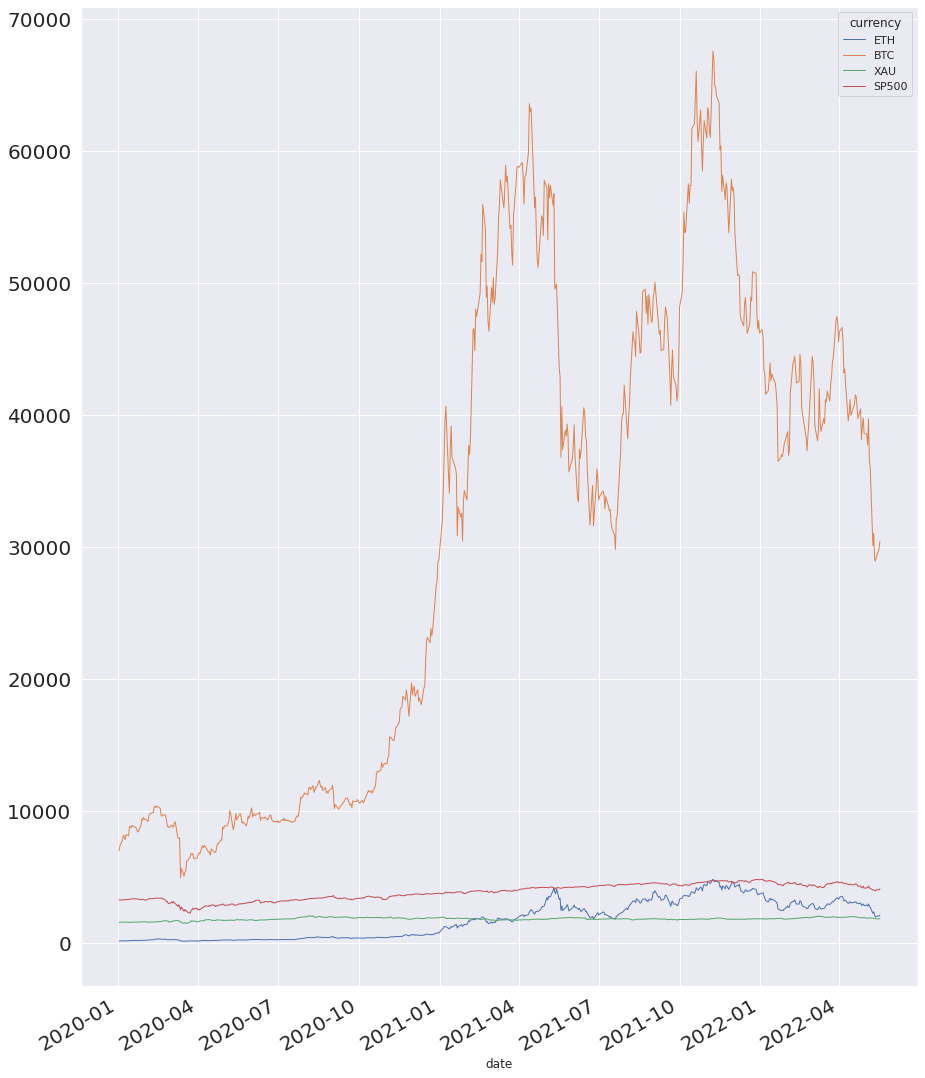

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903143,0.248004,0.924356
BTC,0.903143,1.000000,0.197010,0.872738
XAU,0.248004,0.197010,1.000000,0.376865
SP500,0.924356,0.872738,0.376865,1.000000


In [8]:
#hide ### Koreliacijos matrica.

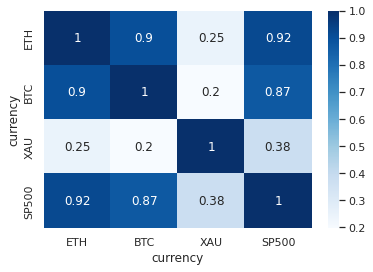

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')